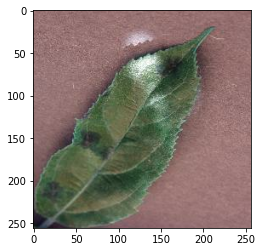

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

Data = "Apple_dataset"
dis_cata = ["Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust", "Apple___healthy"]

for cata in dis_cata:
    path = os.path.join(Data, cata)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [2]:
img_array.shape

(256, 256, 3)

In [3]:
print(img_array.shape)

(256, 256, 3)


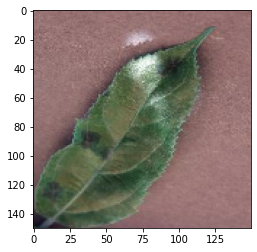

In [4]:
img_size = 150

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()

In [5]:
training_data = []

def create_training_data():
    for cata in dis_cata:
        path = os.path.join(Data, cata)
        class_num = dis_cata.index(cata)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.resize(img_array, (150,150))
                training_data.append([img_array, class_num])
            except Exception as e:
                pass
        
create_training_data()

In [6]:
print(len(training_data))

9714


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:20]:
    print(sample[1])

0
3
3
0
0
0
0
0
0
2
3
2
2
0
0
3
1
1
0
0


In [9]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

In [10]:
X = np.array(X).reshape(-1,150,150,3)/255.0
y = np.array(y)
#print(X.shape, y)

In [11]:
X[1]

array([[[0.89411765, 0.75294118, 0.75294118],
        [0.88627451, 0.74509804, 0.74509804],
        [0.8745098 , 0.73333333, 0.73333333],
        ...,
        [0.63529412, 0.49803922, 0.51372549],
        [0.65882353, 0.52156863, 0.5372549 ],
        [0.65098039, 0.51372549, 0.52941176]],

       [[0.88235294, 0.74117647, 0.74117647],
        [0.87843137, 0.7372549 , 0.7372549 ],
        [0.87843137, 0.7372549 , 0.7372549 ],
        ...,
        [0.65098039, 0.51372549, 0.52941176],
        [0.63529412, 0.49803922, 0.51372549],
        [0.62745098, 0.49019608, 0.50588235]],

       [[0.89019608, 0.74509804, 0.74509804],
        [0.88627451, 0.74509804, 0.74509804],
        [0.88235294, 0.74117647, 0.74117647],
        ...,
        [0.64705882, 0.50980392, 0.5254902 ],
        [0.63529412, 0.49803922, 0.51372549],
        [0.65882353, 0.52156863, 0.5372549 ]],

       ...,

       [[0.72156863, 0.58823529, 0.61176471],
        [0.7254902 , 0.59215686, 0.61568627],
        [0.72941176, 0

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from sklearn import preprocessing
from tensorflow.keras.callbacks import TensorBoard
import time

#le = preprocessing.LabelEncoder()

gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

NAME = "Apple-Leaf-Disease-cnn-64x2-New-1{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))



#y = le.fit_transform(y)

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(Dropout(.2))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(4))
model.add(Activation("softmax"))

model.compile(
loss="sparse_categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"]
)

model.fit(X, y, batch_size=16, epochs=10, validation_split=0.2, callbacks=[tensorboard])
#model_details = model.fit(X, y, batch_size=16, epochs=10, validation_split=0.2)

Epoch 1/10
486/486 [==============================] - 313s 553ms/step - loss: 0.7358 - accuracy: 0.6983 - val_loss: 0.2650 - val_accuracy: 0.9125
Epoch 2/10
486/486 [==============================] - 379s 779ms/step - loss: 0.2230 - accuracy: 0.9201 - val_loss: 0.1617 - val_accuracy: 0.9398
Epoch 3/10
486/486 [==============================] - 403s 830ms/step - loss: 0.1325 - accuracy: 0.9560 - val_loss: 0.1516 - val_accuracy: 0.9429
Epoch 4/10
486/486 [==============================] - 420s 865ms/step - loss: 0.0831 - accuracy: 0.9706 - val_loss: 0.1330 - val_accuracy: 0.9532
Epoch 5/10
486/486 [==============================] - 263s 531ms/step - loss: 0.0535 - accuracy: 0.9802 - val_loss: 0.1615 - val_accuracy: 0.9439
Epoch 6/10
486/486 [==============================] - 236s 486ms/step - loss: 0.0678 - accuracy: 0.9760 - val_loss: 0.1247 - val_accuracy: 0.9614
Epoch 7/10
486/486 [==============================] - 237s 487ms/step - loss: 0.0402 - accuracy: 0.9843 - val_loss: 0.1430 -

In [13]:
#model.save('Apple-leaf-Disease-CNN')
model.save('Apple-leaf-Disease-CNN-NEW-1')


INFO:tensorflow:Assets written to: Apple-leaf-Disease-CNN-NEW-1/assets


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0

In [ ]:
# http://localhost:6007/#scalars&runSelectionState=eyJDYXRzLXZzLURvZ3MtY25uLTY0eDItMTYxNDYwOTY2OC90cmFpbiI6ZmFsc2UsIkNhdHMtdnMtRG9ncy1jbm4tNjR4Mi0xNjE0NjA5NjY4L3ZhbGlkYXRpb24iOmZhbHNlLCJDYXRzLXZzLURvZ3MtY25uLTY0eDItMTYxNDYxMDU2My90cmFpbiI6ZmFsc2UsIkNhdHMtdnMtRG9ncy1jbm4tNjR4Mi0xNjE0NjEwNTYzL3ZhbGlkYXRpb24iOmZhbHNlLCJDYXRzLXZzLURvZ3MtY25uLTY0eDItMTYxNDYxMTE2NC90cmFpbiI6ZmFsc2UsIkNhdHMtdnMtRG9ncy1jbm4tNjR4Mi0xNjE0NjExMDk0L3RyYWluIjpmYWxzZSwiQ2F0cy12cy1Eb2dzLWNubi02NHgyLTE2MTQ2MTEyMDkvdmFsaWRhdGlvbiI6ZmFsc2UsIkFwcGxlLUxlYWYtRGlzZWFzZS1jbm4tNjR4Mi1OZXcxNjE4MjUzMTY1L3RyYWluIjpmYWxzZSwiQXBwbGUtTGVhZi1EaXNlYXNlLWNubi02NHgyLU5ldzE2MTgyNTMxNjUvdmFsaWRhdGlvbiI6ZmFsc2UsIkNhdHMtdnMtRG9ncy1jbm4tNjR4Mi0xNjE0NjExMjA5L3RyYWluIjpmYWxzZSwiQXBwbGUtTGVhZi1EaXNlYXNlLWNubi02NHgyLU5ldy0xMTYxODI5NzY0Ni90cmFpbiI6dHJ1ZSwiQXBwbGUtTGVhZi1EaXNlYXNlLWNubi02NHgyLU5ldy0xMTYxODI5NzY0Ni92YWxpZGF0aW9uIjp0cnVlfQ%3D%3D